#### CS 260 Final Project - Fall 2021
---

# Vaccine status in each state as of 10/27/21

### By: TJ Augustine, Dan Sharo, Ashley Krause


---

## 1. Introduction:

For this project, our group explored Vaccine data in the US since the Covid-19 vaccines came out. Our main question we wanted to answer was: **"How is the United States doing as a whole with vaccination percentages, as well as how is each individual state doing?"**

We decided to ask the following questions: Which companies have administered more doses of the vaccine? Which states have the highest and lowest percentage of their populations vaccinated? Is there any age group that is slacking in percentages vaccinated overall? Which states rely more on different vaccines than other states? And lastly, how many vaccines are being wasted (distributed vs administered)?
> Distributed being the vaccines that were given to the states and Administered being the vaccines that were given to the people in each state
 






We found that the vaccines were distributed to states based on population more so than politics as the top distributed state was CA and followed by TX who are both very different politically leaning states but two of the biggest in the country. This is not to say that population is a sole factor though as New York was fourth on the list for distributed behind Florida in third.

When looking at the line graphs that show the distributed over time per vaccine type that J&J did not really have a chance to take off as it was not distributing anything for the majority of the year till about midway through April.
This explains why in the vaccine distribution bar graph for J&J is so low as it had hardly been distributed throughout the year.





---

## 2. Data

A direct link to the data can be found at the following website. 
 * https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc/data
 
This is the CDC's official vaccine database. It has data from each state for each day since the vaccinations have been introduced. The dataset updates daily, but was downloaded on 10/27, so the data ends then. The dataset was also run through Tableau Prep Builder to remove unnecessary fields and rows.

In [ ]:
... #load data into a data frame
import pandas as pd
url = 'https://raw.githubusercontent.com/tjjoe/CS260FinalProject/main/VaccineStatistics.csv'
vaccines = pd.read_csv(url, parse_dates = ["Date"])
vaccines

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Dist_Per_100K,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Administered,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Admin_Per_100K,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Janssen_12Plus,Series_Complete_Moderna_12Plus,Series_Complete_Pfizer_12Plus,Series_Complete_Janssen_18Plus,Series_Complete_Moderna_18Plus,Series_Complete_Pfizer_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen
0,2021-10-27,43,UT,4328350,195700,1592040,2540610,135010,166972,190276,1183020,3657672,3656681,3313055,728670,150558,1319403,2187458,114090,141062,145643,199160,3625476,1949451,60.8,1948769,75.2,1765003,77.6,351736,96.1,1705559,53.2,1705222,65.8,1549650,68.1,313368,85.6,148155,597567,959831,148120,597533,959563,147982,597183,804479,15714,133291,164362,102436.0,6.0,102079.0,6.6,83197.0,12.7,66682.0,21.3,9371.0,92981.0,83.0
1,2021-10-27,43,KY,6240815,310500,2665520,3264795,139688,163966,180120,831483,5262162,5260985,4951368,1450415,205908,2137697,2917075,117783,138223,142905,193243,5282026,2797423,62.6,2796985,73.5,2627281,75.8,720509,96.0,2438895,54.6,2438819,64.1,2298429,66.3,640509,85.3,202520,970923,1264050,202489,970910,1264020,202393,970684,1124004,38429,291397,309972,211994.0,8.7,211694.0,9.2,179496.0,13.9,136241.0,21.3,38911.0,172545.0,489.0
2,2021-10-27,43,NV,4267880,211600,1531060,2525220,138561,162784,178758,860508,3597492,3597435,3370957,903936,156431,1245093,2195667,116796,137212,141191,182255,3566516,1940068,63.0,1939966,74.0,1812998,75.9,448462,90.4,1622453,52.7,1622413,61.9,1526066,63.9,390685,78.8,154181,561072,907161,154177,561068,907129,154138,560973,810917,24300,181596,184767,109034.0,6.7,108928.0,7.1,92227.0,11.7,71229.0,18.2,17696.0,91287.0,51.0
3,2021-10-27,43,ME,2327320,127900,961380,1238040,173136,196409,212469,815845,1938217,1938092,1822835,601482,121121,758624,1056989,144190,163561,166413,210850,1947060,1023788,76.2,1023673,86.4,963785,88.0,291700,99.9,945153,70.3,945117,79.8,890976,81.3,269838,94.6,119441,356508,468866,119421,356501,468857,119367,356447,414855,23078,122540,124070,80642.0,8.5,80565.0,9.0,71812.0,13.7,58035.0,21.5,10293.0,70135.0,108.0
4,2021-10-27,43,TN,9213340,419100,3585220,5209020,134911,157882,173212,805789,7364052,7363155,6995167,2188514,214890,2757791,4358094,107832,126177,131510,191405,7221651,3710401,54.3,3709647,63.6,3508983,66.0,994061,86.9,3242140,47.5,3241953,55.6,3081627,57.9,912011,79.8,207044,1195676,1831005,206998,1195656,1830886,206782,1195183,1671323,33343,450765,423311,337158.0,10.4,336419.0,10.9,277943.0,15.7,208830.0,22.9,69141.0,266185.0,795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,2020-12-14,51,VT,1950,0,0,0,313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,

### 2.1 Variables Explained

Below is a list of each variable in the dataset and its explanation.

* **Date** - Date
* **MMWR_week** - Morbidity and Mortality Weekly Report (MMWR ) (Early data in the set has a later MMWR week because vaccine came out late in the year last year)
* **Location** - State/Territory/Federal Entity
* **Distributed** - Total number of distributed doses
* **Distributed_Janssen/Moderna/Pfizer** - Total number of doses delivered for each respective company
* **Distributed_per_100k** - Delivered doses per 100,000 census population
* **Distributed_per_100k_12Plus/18Plus/65Plus** - Total number of delivered doses per 100,000 in each age group
* **Administered** - Total number of administered vaccines based on state where administered
* **Administered_12Plus/18Plus/65Plus** - Total number of doses administered to people in each age group based on the jurisdiction where recipient lives
* **Administered_Janssen/Moderna/Pfizer** - Total number of doses administered for each company
* **Admin_per_100k** - Total number of doses administered per 100,000 census population based on the jurisdiction where recipient lives
* **Admin_per_100k_12Plus/18Plus/65Plus** Total number of doses administered to people in each age group per 100,000 each age group population
* **Recip_Administered** - Total number of administered vaccines based on the jurisdiction of residence
* **Administered_Dose1_Recip** - Total number of people with at least one dose based on the jurisdiction where recipient lives
* **Administered_Dose1_Pop_Pct** - Percent of population with at lease one dose based on the jurisdiction where recipient lives
* **Administered_Dose1_Recip_12Plus/18Plus/65Plus** - Total number of people in each age group with at least one dose based on the jurisdiction where recipient lives
* **Administered_Dose1_Recip_12Plus/18Plus/65PlusPop_Pct** - Percent of each age group population with at least one dose based on the jurisdiction where recipient lives
* **Series_Complete_Yes** - Total number of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives
* **Series_Complete_Pop_Pct** - Percent of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives
* **Series_Complete_12Plus/18Plus/65Plus** - Total number of people in each age group who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives
* **Series_Complete_12Plus/18Plus/65PlusPop_Pct** - Percent of people in each age group who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives
* **Series_Complete_Janssen/Moderna/Pfizer** - Total number of people who are fully vaccinated with each vaccine based on the jurisdiction where recipient lives
* **Series_Complete_Janssen/Moderna/Pfizer_12Plus/18Plus/65Plus** - Total number of people in each age group who are fully vaccinated with the each vaccine based on the jurisdiction where recipient lives
* **Additional_Doses** - Total number of people who are fully vaccinated and have received a booster (or additional) dose.
* **Additional_Doses_Vax_Pct** - Percent of people who are fully vaccinated and have received a booster (or additional) dose.
* **Additional_Doses_18Plus/50Plus/65Plus** - Total number of people in each age group that are fully vaccinated and have received a booster (or additional) dose.
* **Additional_Doses_18Plus/50Plus/65Plus_Vax_Pct** - Percent of people in each age group who are fully vaccinated and have received a booster (or additional) dose.
* **Additional_Doses_Moderna/Pfizer/Janssen** - Total number of fully vaccinated people who have received a booster from any company (or additional) dose.

---

## 3. Results

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
vaccines = vaccines.sort_values(by='Distributed', ascending = False)

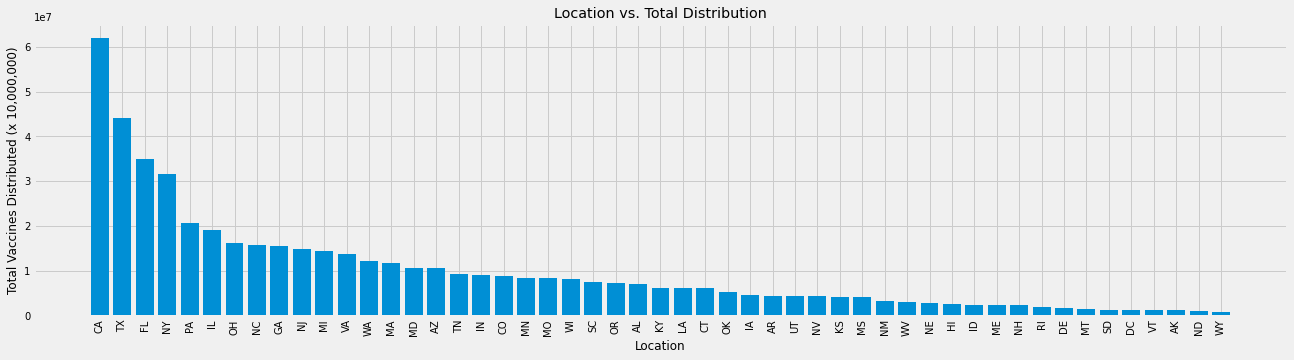

In [ ]:
plt.figure(figsize =(20,5)) 
plt.rcParams['font.size'] = '10'
plt.xticks(rotation = 90)
plt.bar(vaccines['Location'],vaccines['Distributed'])
plt.title("Location vs. Total Distribution")
plt.ylabel("Total Vaccines Distributed (x 10,000,000)")
plt.xlabel("Location");


Graph 1: When looking at this graph we can take a look at the different locations and see which areas have recieved distributions of the vaccine more than others. Here we can see that California is the has had more vaccines distributed. While Wyoming has the the least amount of vaccines distributed. This can most likely be attributed to population, as the more people are in a state, the more vaccines will be needed.

In [ ]:
vaccines = vaccines.sort_values(by='Dist_Per_100K', ascending = False)

Text(0.5, 0, 'Location')

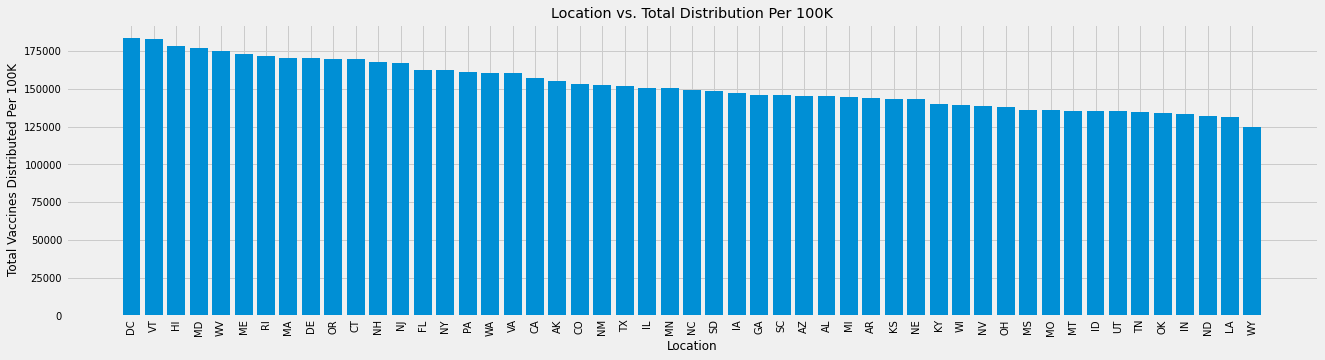

In [ ]:
plt.figure(figsize =(20,5)) 
plt.rcParams['font.size'] = '10'
plt.xticks(rotation = 90)
plt.bar(vaccines['Location'],vaccines['Dist_Per_100K'])
plt.title("Location vs. Total Distribution Per 100K")
plt.ylabel("Total Vaccines Distributed Per 100K")
plt.xlabel("Location")

The main difference between this graph and the first one is that this shows how many vaccones have been distributed per 100k in the population versus total distributed in general. This shows how well the states are covering their populations. At this point every state is over 100k, because there were a significant amount of vaccines wasted up to this point, and there also needs to be supply for people who have not gotten it yet

In [ ]:
vaccines = vaccines.sort_values(by='Series_Complete_Pop_Pct', ascending = False)

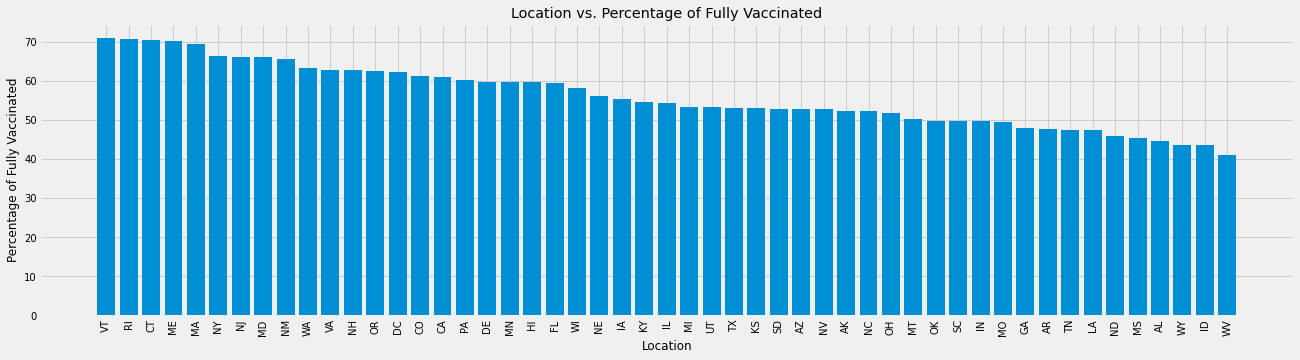

In [ ]:
plt.figure(figsize =(20,5)) 
plt.rcParams['font.size'] = '10'
plt.xticks(rotation = 90)
plt.bar(vaccines['Location'],vaccines['Series_Complete_Pop_Pct'])
plt.title("Location vs. Percentage of Fully Vaccinated")
plt.ylabel("Percentage of Fully Vaccinated")
plt.xlabel("Location");

Graph 2: Looking at this graph we can see based on loctaion, what area has the highest and the lowest percentage of fully vaccinated. Here we see that many of the New England states have the highest percentage of fully vaccinated people. West Virginia has the worst.  

In [ ]:
groupedvstates = vaccines.groupby('Location').sum()


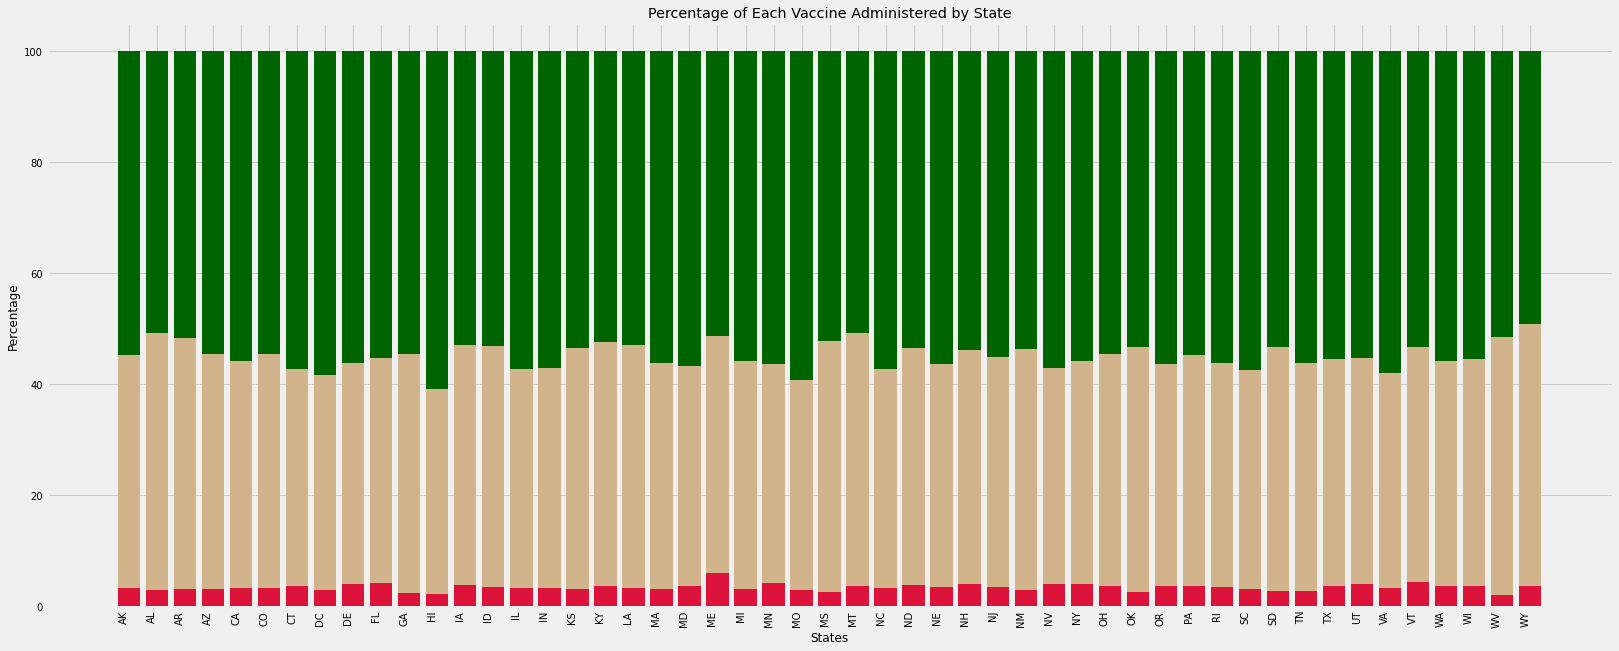

In [ ]:
groupedvstates = groupedvstates.sort_values(by='Location', ascending = True)

total = groupedvstates['Administered_Pfizer'] + groupedvstates['Administered_Moderna'] +groupedvstates['Administered_Janssen']
proportion_pfizer = np.true_divide(groupedvstates['Administered_Pfizer'], total) * 100
proportion_moderna = np.true_divide(groupedvstates['Administered_Moderna'], total) * 100
proportion_jj = np.true_divide(groupedvstates['Administered_Janssen'], total) * 100

plt.figure(figsize =(25,10))
ind = np.arange(51) 
plt.bar(groupedvstates.index, proportion_pfizer, width=0.8, label='Pfizer', color='darkgreen', bottom=proportion_jj+proportion_moderna)
plt.bar(groupedvstates.index, proportion_moderna, width=0.8, label='Moderna', color='tan', bottom=proportion_jj)
plt.bar(groupedvstates.index, proportion_jj, width=0.8, label='Janssen', color='crimson')


plt.ylabel("Percentage")
plt.xlabel("States")
plt.title("Percentage of Each Vaccine Administered by State")
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

Graph 3: This graph shows the percentages of each vaccine used in each state. Here we see that Phizer is the most widely used for each state, which makes sense since it was out first. We also see that J&J is by far the lowest used, probably because they were having issues with safety.

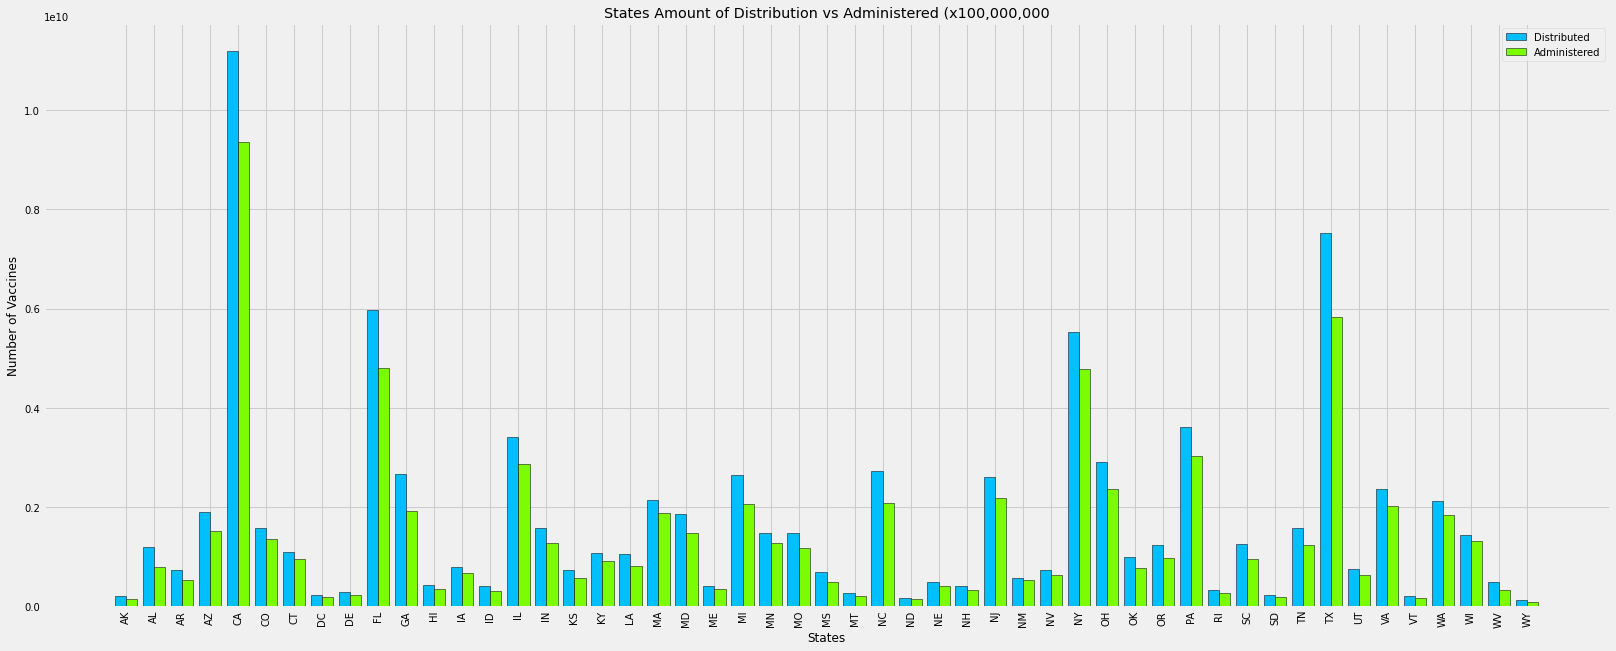

In [ ]:
plt.figure(figsize =(25,10))
bystate = groupedvstates.index
dis = groupedvstates['Distributed']
adm = groupedvstates['Administered']

X_axis = np.arange(len(bystate))
  
plt.bar(X_axis - 0.2, dis, 0.4,color='deepskyblue',edgecolor = 'black',label = 'Distributed')
plt.bar(X_axis + 0.2, adm, 0.4,color = 'lawngreen',edgecolor = 'black',label = 'Administered')

plt.xticks(X_axis, bystate)
plt.xlabel("States")
plt.ylabel("Number of Vaccines")
plt.title("States Amount of Distribution vs Administered (x100,000,000")
plt.legend()
plt.xticks(rotation = 90)
plt.rcParams['font.size'] = '15'
plt.show()


Graph 4: This is a double bar graph comparing the amount of distributed vaccines in each state compared to that of the vaccines administered. This can show us how many are being wasted, or have not been given yet. The distance between the heights of the blue and green bars show this.

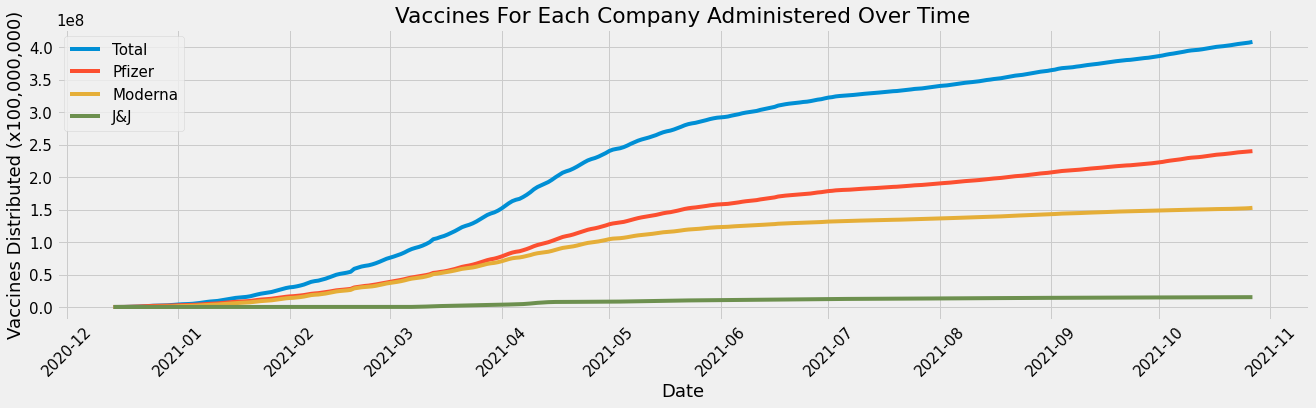

In [ ]:
vaccineDates = vaccines.groupby('Date').sum()
vaccineDates

plt.figure(figsize =(20,5)) 
plt.plot(vaccineDates.index, vaccineDates['Administered'])  
plt.plot(vaccineDates.index, vaccineDates['Administered_Pfizer']) 
plt.plot(vaccineDates.index, vaccineDates['Administered_Moderna'])
plt.plot(vaccineDates.index, vaccineDates['Administered_Janssen'])  
plt.xticks(rotation = 45)
plt.title('Vaccines For Each Company Administered Over Time')    
plt.xlabel('Date')                     
plt.ylabel('Vaccines Distributed (x100,000,000)')
plt.legend(['Total', 'Pfizer', 'Moderna', 'J&J'])
 

Graph 5:
This Chart shows how many vaccines have been distributed over time. It is color coded for each vaccine, and has a line showing the total. You can see that Pfizer starts to pull away around April 2021. This most likely includes the hospital workers, since it staets to rise in January.

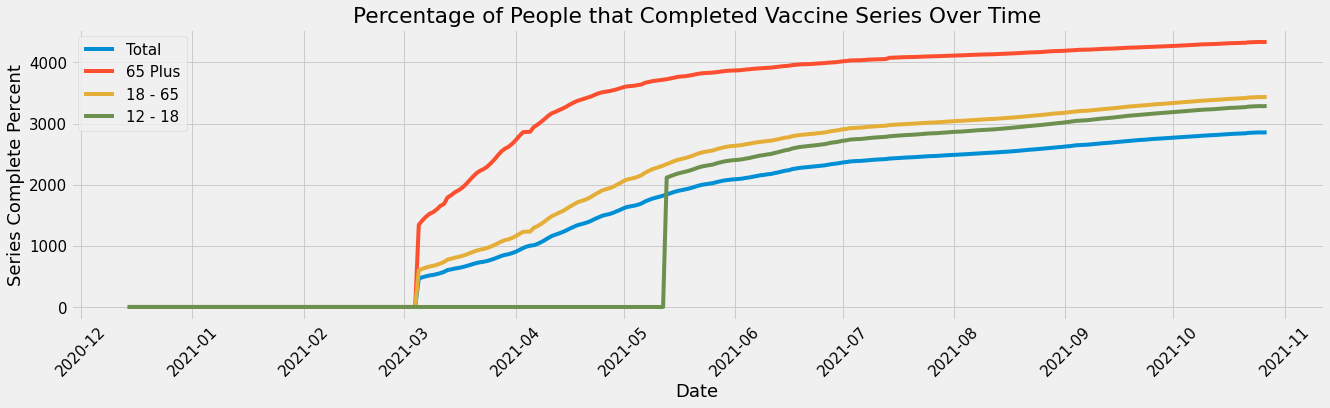

In [ ]:
plt.figure(figsize =(20,5)) 
plt.plot(vaccineDates.index, vaccineDates['Series_Complete_Pop_Pct'])
plt.plot(vaccineDates.index, vaccineDates['Series_Complete_65PlusPop_Pct'])  
plt.plot(vaccineDates.index, vaccineDates['Series_Complete_18PlusPop_Pct'])
plt.plot(vaccineDates.index, vaccineDates['Series_Complete_12PlusPop_Pct']) 

plt.xticks(rotation = 45)
plt.title('Percentage of People that Completed Vaccine Series Over Time')    
plt.xlabel('Date')                     
plt.ylabel('Series Complete Percent')
plt.legend(['Total','65 Plus', '18 - 65', '12 - 18'])

Graph 6: This is a line graph of percentages for the population to have finished their series over time. As you can see, in March it was released for the first time. Most 65+ people could get it first, so they are the red line. The orange line is the 18-64 year olds that got them. The blue line is the total population percentage to recieve the vaccine, and it makes sense that it is not the top, since the 18 plus and 12 plus did not have full access at the time. The green line is 12-17 year olds. This probably includes just the public, since the jumps are at March and May, and nothing before. I am honestly surprised that the percentage of 18-65 year olds that have gotten it is still above the 12-18 year olds because most schools probably require it by now.

In [ ]:
import plotly.graph_objects as go
vaccines = vaccines.sort_values(by='Date', ascending = False)
vaccines_lastDay = vaccines.head(51)
vaccines_lastDay


fig = go.Figure(data=go.Choropleth(
    locations=vaccines_lastDay['Location'], # Spatial coordinates
    z = vaccines_lastDay['Series_Complete_Pop_Pct'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    showscale = True,
    colorbar_title = "Percentage Vaccinated",
))

fig.update_layout(
    title_text = 'Vaccine Percentages by State',
    geo_scope='usa', 
)

fig.show()



Graph 7: This map gives a nice color coded view of each state where it can be seen what states are doing well. The darker blue means more people are vaccinated, while the lighter means less are vaccinated.

#THE IMPORTANCE OF COLLECTING ACCURATE DATA

In [ ]:
vaccines_lastDay = vaccines.head(51)
vaccines_lastDay[["Date", "Location", "Distributed_Per_100k_12Plus", "Distributed_Per_100k_18Plus", "Distributed_Per_100k_65Plus", "Admin_Per_100k_12Plus", "Admin_Per_100k_18Plus", "Admin_Per_100k_65Plus"]]

,Date,Location,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus
21,2021-10-27,VT,206919,223540,911732,174292,176195,235489
45,2021-10-27,AR,170132,187720,830473,125060,128884,173773
41,2021-10-27,GA,172142,190697,1019960,126351,131280,186250
28,2021-10-27,FL,186837,202525,776705,151079,154798,208480
30,2021-10-27,AL,170133,186723,838191,114757,119481,171643
38,2021-10-27,ND,157614,172608,838074,123998,128652,187695
49,2021-10-27,WY,147388,162522,729252,114745,119953,178541
42,2021-10-27,HI,208753,226543,941795,161867,164791,202400
43,2021-10-27,MO,159185,174843,784764,127931,132272,185687
19,2021-10-27,MN,177410,195477,921009,148261,152003,208464


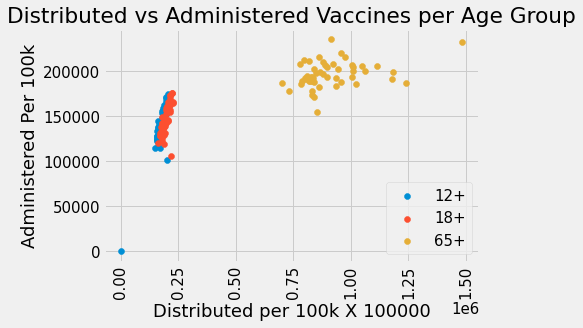

In [ ]:
plt.scatter(vaccines_lastDay['Distributed_Per_100k_12Plus'],vaccines_lastDay["Admin_Per_100k_12Plus"])
plt.scatter(vaccines_lastDay["Distributed_Per_100k_18Plus"],vaccines_lastDay["Admin_Per_100k_18Plus"])
plt.scatter(vaccines_lastDay["Distributed_Per_100k_65Plus"],vaccines_lastDay["Admin_Per_100k_65Plus"])
plt.xticks(rotation = 90)
plt.legend(['12+', '18+', '65+'], loc = 0)
plt.xlabel("Distributed per 100k X 100000")
plt.ylabel("Administered Per 100k")
plt.title("Distributed vs Administered Vaccines per Age Group");

Some strange things happen in this scatter plot. It was supposed to be distributed vs administered for each age group, but 65+ seems to absolutely destroy both of the other groups. Logically, you would think they would be similar, or even lower since the 65+ population is less than the population of the other groups. There is also one state that has a 12+ point at (0,0). For whatever reason, ID did not log their distributions and administrations for 12+.  

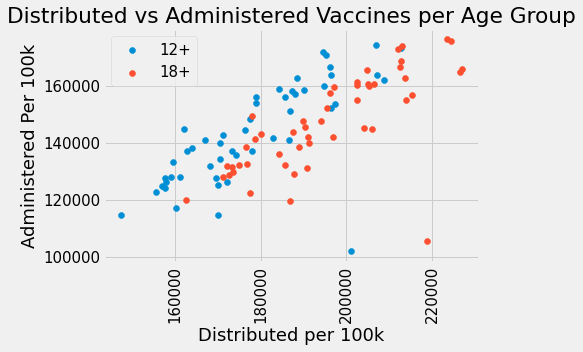

In [ ]:
where_not0 = (vaccines_lastDay['Distributed_Per_100k_12Plus'] > 0)
where_not0 =vaccines_lastDay[where_not0]
plt.scatter(where_not0['Distributed_Per_100k_12Plus'],where_not0["Admin_Per_100k_12Plus"])
plt.scatter(where_not0["Distributed_Per_100k_18Plus"],where_not0["Admin_Per_100k_18Plus"])
plt.xticks(rotation = 90)
plt.legend(['12+', '18+', '65+'], loc = 0)
plt.xlabel("Distributed per 100k")
plt.ylabel("Administered Per 100k")
plt.title("Distributed vs Administered Vaccines per Age Group");

This graph is edited to remove the outlier Idaho. It also takes out the 65+ because it seems that most states were just collecting all of their total data and just putting it in as 65+. 

## 4. Conclusion

Throughout this analysis we have learned much about the vaccine and the different rates of vaccintion versus location and vaccination versus age range. We began the analysis by looking into the ditribution rates versus location. The orginal story started by lookinig at the total distribution based on location. Here we saw California as having the most distributed and Wyoming being the least amount distributed. This caused the question of if this was due to population, because California has a population of about 40 million and Wyoming only has a population of 600,000. SO then we loked into total ditribution by 100K. This created a better analysis due to the fact that we could compare apples to apples. We then saw that California was near the middle and DC had the most distributed per 100k with Wyoming still having least distributed. This led us to question the percentage of each vaccine used per each state. We created a bar chart that showed the amounts of each vaccine give out. Here we saw Pfizer was the most taken, then Moderna, and then J&J. After looking at the breakdown of each vaccine that was given out we questioned the percentage of fully vaccinated within each state. We first started by creating a bar graph to show this. This analysis had shown us that Vermont has the highest percentage of fully vaccinated and West Virgina has the lowest perentage.  Once looking at the bar graph we decided to create a map graph to create more of a visal in vaccinated percentage by state. This ultimately was a great visual for the eye and backed up what we had found within the bar chart. This then made us question the timleine of the vaccine. Here we just created a simply timeline with a breakdown of each vaccine. Here we can see similar results with Pfizer taking off and J&J remaining low, most likely due to the problems that had occured during the pandemic with J&J. We then strted to question age range and distribution. We had created a scatter plot that showed the distribution per 100K based on age group versus administered by 100k. Here we can see as distribution increases, so does distribution. Going along with age group we decided to look at the timeline of fully vaccinated by age group. here we can see 12+ have a very rapid spike around May 2021 and 65+ seems to have the highest percentage over time. Overall we have learned a great amount about the vaccine based on location, age range, and percentage of fully vaccinated. We would be interested in learning more. Such as does political party have an affect of vaccine percentages? Does gender have an affect of percentage of fully vaccinated? What is the correlation with fully vaccinated that have recieved the booster shot? All this and more. 